In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
import scipy.io as sio

In [9]:
reader = sio.loadmat(r'..\positions_and_velocities_1.mat')
data1 = reader.get('y')
reader = sio.loadmat(r'..\positions_and_velocities_2.mat')
data2 = reader.get('y')

x1=[]
y1=[]
x2=[]
y2=[]
for data in (data1,data2):
    theta_1=data[:,0]
    theta_2=data[:,1]
    theta_1_dot=data[:,2]
    theta_2_dot=data[:3]

    x1.append(0.5*np.sin(theta_1))
    y1.append(0.5*np.cos(theta_1))

    x2.append(0.5*np.sin(theta_1)+0.5*np.sin(theta_2))
    y2.append(0.5*np.cos(theta_1)+0.5*np.cos(theta_2))

FileNotFoundError: [Errno 2] No such file or directory: '..\\positions_and_velocities_1.mat'

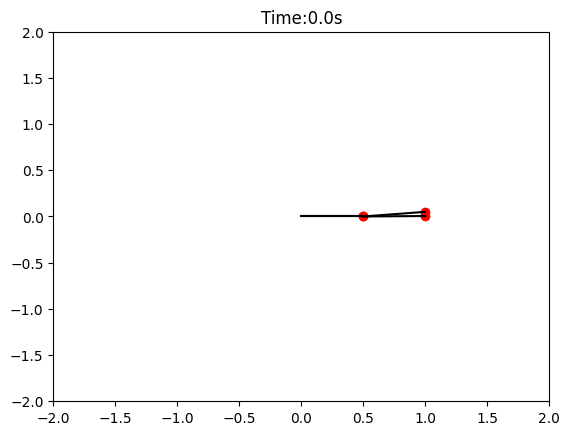

In [8]:
plt.ion()
t=np.linspace(0,20,100)
fig,axis=plt.subplots()
axis.set_xlim(-2,2)
axis.set_ylim(-2,2)

line1,=axis.plot([0,x1[0][0]],[0,-y1[0][0]],color="k")
line2,=axis.plot([x1[0][0],x2[0][0]],[-y1[0][0],-y2[0][0]],color="k")
scatter1=axis.scatter([x1[0][0]],[-y1[0][0]],color="r")
scatter2=axis.scatter([x2[0][0]],[-y2[0][0]],color="r")

line3,=axis.plot([0,x1[1][0]],[0,-y1[1][0]],color="k")
line4,=axis.plot([x1[1][0],x2[1][0]],[-y1[1][0],-y2[1][0]],color="k")
scatter3=axis.scatter([x1[1][0]],[-y1[1][0]],color="r")
scatter4=axis.scatter([x2[1][0]],[-y2[1][0]],color="r")

def update(i):
    axis.set_title(f"Time:{np.round(0+i*0.2,2)}s")
    line1.set_data([0,x1[0][i]],[0,-y1[0][i]])
    line2.set_data([x1[0][i],x2[0][i]],[-y1[0][i],-y2[0][i]])
    scatter1.set_offsets([[x1[0][i],-y1[0][i]]])
    scatter2.set_offsets([[x2[0][i],-y2[0][i]]])

    line3.set_data([0,x1[1][i]],[0,-y1[1][i]])
    line4.set_data([x1[1][i],x2[1][i]],[-y1[1][i],-y2[1][i]])
    scatter3.set_offsets([[x1[1][i],-y1[1][i]]])
    scatter4.set_offsets([[x2[1][i],-y2[1][i]]])
    return (line1,line2,scatter1,scatter2,line3,line4,scatter3,scatter4)

ani=animation.FuncAnimation(fig,update,len(t),interval=150,repeat=False)
ani.save(r'..\Images\Double Pendulum.mp4')
ani.save(r'..\Images\Double Pendulum.gif')